# Tutorial 2 - The Queens & The Art of Branching (NOTES Persos: precise the vars and value orderings). The ones thgat make the observations waited for


**NOTE : You must fully finish Tutorial i-1 before starting Tutorial i (i>1)**

Constraint programming is used to solve highly combinatorial and complex problems. 
In order to master CP, you need to get used to the philosophy behind this approach as well as the different 
techniques used along with it. We will guide you in this process step by step in the upcoming tutorials. We will be using "toy" puzzles/problems only for the purpose of learning different faces of CP. In real life problems, things get messed up easily and require decision and policy makes to agree opon the problem at hand.. (Trust us, we've been there..) 

In this tutorial, we use the N-Queens problem, one of oldest and classical problems solved efficiently by CP, as a case study. 

## The N-Queens problem

You are given an N-by-N chessboard, and your goal is to place N chess queens on it so that no two queens threaten each other:

<div class="row" style="margin-top: 10px">
    <div class="col-md-5">
        <img src="display/images/empty-chessboard.png" style="margin-right: 0; width: 160px;" />
    </div>
    <div class="col-md-2" style="display: table">
        <i class="fa fa-arrow-right" style="display: table-cell; font-size: 50px; 
        margin: auto; text-align: center; vertical-align: middle; height: 150px"></i>
    </div>
    <div class="col-md-5">
        <img src="display/images/nqueens8-chessboard.png" style="margin-left: 0; width: 160px;" />
    </div>
</div>

Formally, a solution to the N-queens problem requires that no two queens share the same row, column or diagnoal.

### First model without global constraints

**Exercice**: Create a function `decomposition_model(N)` that models the problem using only binary inequality constrants (no global constraint) and returns an instance of `CpoModel` for the n-queens problem with `N` queens.

In [6]:
from config import setup
setup()

In [7]:
from docplex.cp.model import CpoModel

def decomposition_model(N):
    mdl = CpoModel(name='nqueens')
    q = mdl.integer_var_list(N, 0, N - 1, 'q')
    for i in range(N):
        for j in range(i + 1, N):
            mdl.add(q[i] != q[j])
            mdl.add(q[j] - q[i] != j - i)
            mdl.add(q[i] - q[j] != j - i)
    return mdl, q

Test your function by solving the n-queens problem for small values of $N$ ($< 20$).

*Note: Use the `display.n_queens` function in order to display a solution for the n-queens problem. This function can take a list of `int` corresponding to the column of the queens in order to display them.*

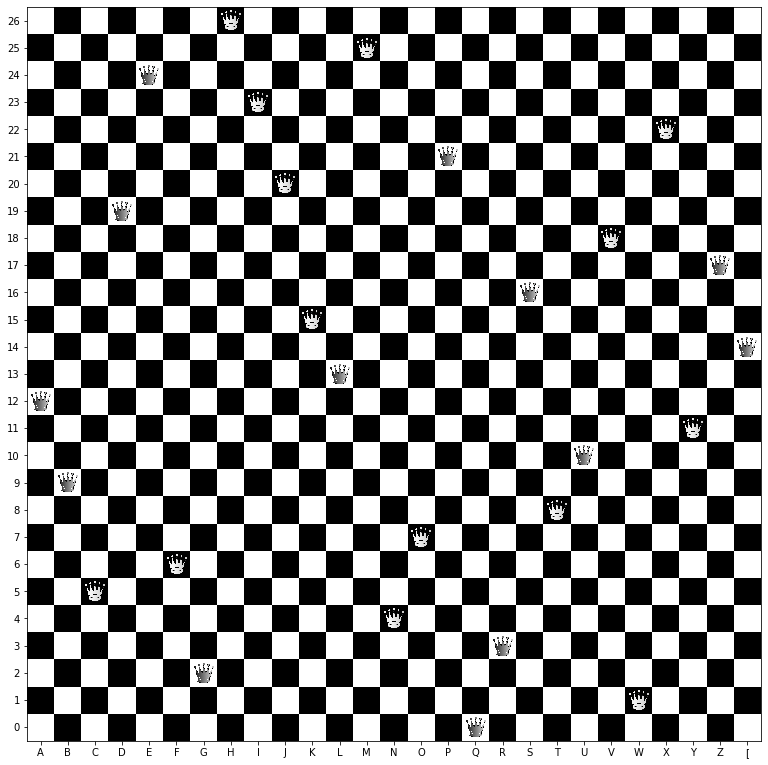

In [8]:
from display import n_queens as display_queens

mdl, queens = decomposition_model(27)
 
sol = mdl.solve()

display_queens([sol[q] for q in queens])

**Question**: How many solutions are there for $N = 3,~\ldots,~10$? 

**Note:** To answer this question, you must force the solver to use a depth first strategy: ... start_search(SearchType='DepthFirst')


In [53]:
for n in range(3, 10 + 1):
    mdl, _ = create_n_queens_model_2(n)
    sols = list(mdl.start_search(SearchType='DepthFirst'))
    print('N={}, {} solution(s) found.'.format(n, len(sols)))

N=3, 0 solution(s) found.
N=4, 2 solution(s) found.
N=5, 10 solution(s) found.
N=6, 4 solution(s) found.
N=7, 40 solution(s) found.
N=8, 92 solution(s) found.
N=9, 352 solution(s) found.
N=10, 724 solution(s) found.


### Second model with global constraints

Create a function `global_constraint_model(N)` that models and returns an instance of `CpoModel` for the n-queens problem with `N` queens, using **only** and exaclty 3 global constraints.

In [34]:
from docplex.cp.model import CpoModel

def global_constraint_model(N):
    mdl = CpoModel(name='nqueens')
    q = mdl.integer_var_list(N, 0, N - 1, 'q')
    mdl.add(mdl.all_diff(q))
    mdl.add(mdl.all_diff([q[i] + i for i in range(N)]))
    mdl.add(mdl.all_diff([q[i] - i for i in range(N)]))
    return mdl, q

Test your function by solving the n-queens problem for small values of  N  ( <20 ).

In [ ]:
#Similar as above

How many solutions are there for  $N=3, .., 10$ ? It must be the same number as the previous model! 

In [ ]:
#Similar as above

### Comparison of the two models

We will compare the two models properly. Consider the run(model,params) function that we used in the first tutorial. We will used it here.

To comprate the two models, we will fix the parameters to be : 
    
    TimeLimit=5
    
And we keep all the other parameters by default    

Compare the two models for $N \in \{200, 400, 600, .., 2000 \}$. By "compare" we ask you to plot the runtime **and** the number of decisions made by the solver for each model as a function of $n$

In [82]:
## Here they need to plot . the results.. 

from docplex.cp.parameters import CpoParameters

def run(model, params): 
    sol = model.solve(TimeLimit= params.TimeLimit , LogPeriod = params.LogPeriod )
    #print(sol.get_solver_log())
    return sol.get_solver_infos()['NumberOfChoicePoints'], sol.get_solver_infos()['TotalTime'] , sol.get_solve_status() 

parameters = CpoParameters(TimeLimit=10, SearchType='DepthFirst')

mdl , x = global_constraint_model(2000)
run(mdl,parameters)
sol = mdl.solve( )
sol.print_solution()


-------------------------------------------------------------------------------
Model constraints: 3, variables: integer: 2000, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.57 sec
-------------------------------------------------------------------------------
q0: 993
q1: 1727
q10: 1764
q100: 1128
q1000: 457
q1001: 419
q1002: 857
q1003: 509
q1004: 293
q1005: 1263
q1006: 1056
q1007: 1930
q1008: 1363
q1009: 584
q101: 192
q1010: 325
q1011: 1578
q1012: 549
q1013: 1796
q1014: 661
q1015: 939
q1016: 1782
q1017: 619
q1018: 1986
q1019: 581
q102: 87
q1020: 1095
q1021: 1138
q1022: 1626
q1023: 848
q1024: 27
q1025: 814
q1026: 106
q1027: 1249
q1028: 454
q1029: 283
q103: 1355
q1030: 1381
q1031: 1424
q1032: 1737
q1033: 224
q1034: 1393
q1035: 64
q1036: 1993
q1037: 1897
q1038: 1401
q1039: 209
q104: 961
q1040: 1234
q1041: 205
q1042: 1074
q1043: 755
q1044: 1085
q1045: 872
q1046: 1664
q1047: 387
q1048: 1618
q1049: 816
q105:

What do you observe? Why? 

### Branching strategies

Before you start this part, please ask one of your supervisors to check on your work! This is mandatory for the rest! 


Exciting things are about to start. A CP solver is, at the end of the day, a backtracking solver. At each node, it applies filtering (called also propagation or pruning), then make a decision about the next node to explore. This decision is a pure heuristic choice! That is, it could be a wrong decision. It's only based on intuition. 

In CP, a decision is, most of the times, of the type: Choose an unassigned variable $x$, choose a value $v$ from the current domain of $x$, and assign $v$ to $x$. These steps require a variable heuristic and a value heuristic. This is what we call branching strategy. 

Branching strategies can be generic (strategies that can be used for any problem), or specific (designed for the problem at hand). In CPOptimizer, there are a number of genereic strategies offered. This concerns both variable and value heuristics. 

For example, if $L$ is the list of decision variables, then by declaring a search_phase as follows: 
```
SearchPhase= model.search_phase(L, 
                                varchooser=model.select_smallest(model.domain_size()),
                                valuechooser=model.select_random_value())

model.add_search_phase(SearchPhase)
```
The variable heuristic here is the one that picks the variable $x$ with the smallest domain size, and assigns a random value from its domain to it. 


Read about the different search strategies here : 
http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.modeler.py.html#search-phases


We want to evaluate different strategies: 
- For variable evaluators, we will use 
 - domain_size() 
 - var_impact()
 - var_local_impact() 
 - var_index()
 
- For value evaluators, we will use 
 - value_impact()
 - value_index()
 
As for the selectors we will use : 
- select_smallest() 
- select_largest ()

How many strategies are we going to evaluate? 

In addition to the above strategies, we will use also a pure random selection for variables and values. How can we use such a branching heuristic? 

Using the global constraints model, run the different strategies (all of them! + pure random) for different values of $N$. Make sure you choose a good value of $N$ that can assess your claims of evaluation. Feel free to use any reasnable time limit. 

**Requirement for this exercice : You must use the parameter**

```
SearchType='DepthFirst'
```
**We will investigate deeply this choice in the next tutorial. But at this stage you should trust us and include it in the solver's parameters.**  


Present the results (rutime + number of nodes) via a table first then using plots. 

In [69]:
mdl, queens = create_n_queens_model_2(3000)

sf = mdl.search_phase(queens, 
                                      varchooser=mdl.select_smallest(mdl.domain_size()),
                                      valuechooser=mdl.select_random_value())
mdl.add_search_phase(sf)
sol = mdl.solve(TimeLimit=30)
print (sol)

-------------------------------------------------------------------------------
Model constraints: 3, variables: integer: 3000, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 1.33 sec
-------------------------------------------------------------------------------
q0: 657
q1: 742
q10: 2281
q100: 2256
q1000: 1773
q1001: 2153
q1002: 2122
q1003: 102
q1004: 1342
q1005: 1252
q1006: 735
q1007: 700
q1008: 1805
q1009: 111
q101: 2224
q1010: 2189
q1011: 1834
q1012: 50
q1013: 1879
q1014: 2917
q1015: 860
q1016: 1350
q1017: 2002
q1018: 967
q1019: 2317
q102: 715
q1020: 62
q1021: 4
q1022: 2958
q1023: 952
q1024: 2979
q1025: 552
q1026: 1997
q1027: 238
q1028: 2401
q1029: 1492
q103: 1109
q1030: 126
q1031: 992
q1032: 2435
q1033: 793
q1034: 1429
q1035: 1422
q1036: 1230
q1037: 281
q1038: 1511
q1039: 1463
q104: 1172
q1040: 1630
q1041: 1729
q1042: 2886
q1043: 2734
q1044: 7
q1045: 1318
q1046: 2954
q1047: 766
q1048: 970
q1049: 2382


Is this what you expect? Is the choice of the branching strategy important? Justify

Well I hope the answer is yes

What is more important, the variable ordering or the value ordering choice? Justify

What is the best variable ordering choice? Justify

--

What is the best value ordering choice? Justify

--

What is a good branching overall? Any thoughts why this is the case? Justify

--

Did you observe an opposite behaviour of heuristics betwen the runtime and the number of nodes? 
For instance, is there a strategy that is faster than others to solve the problem but requires a larger number of nodes? 
And conversely, is there a heuristic that is slow to solve the problem than others but uses less nodes? 
If you observe this, why is this happening? 

What did you learn today? 